In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv(r"C:\Users\H P\Downloads\sales.csv")

# Connect to database
conn = sqlite3.connect("sales.db")

# Store in SQL
df.to_sql("sales", conn, if_exists="replace", index=False)


50

In [4]:
query = "SELECT SUM(amount) as total_revenue FROM sales"
revenue = pd.read_sql_query(query, conn)
print("Total Revenue:")
print(revenue)


Total Revenue:
   total_revenue
0        1726089


  customer  total_spent
0    Meera       524353
1    Sneha       293011
2    Arjun       259116
3    Kiran       201724
4     Ravi       173038


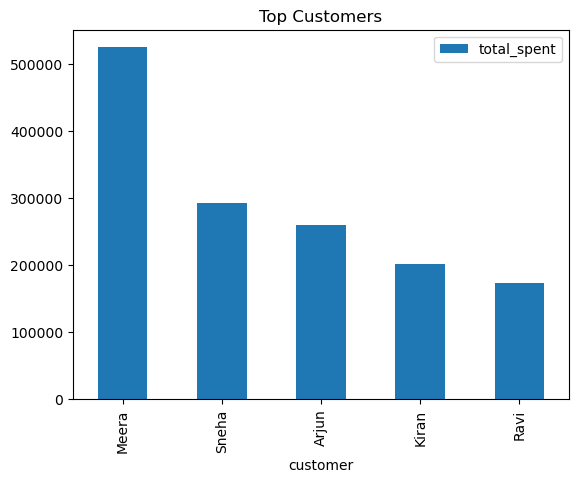

In [5]:
query = """
SELECT customer, SUM(amount) as total_spent
FROM sales
GROUP BY customer
ORDER BY total_spent DESC
LIMIT 5
"""
top_customers = pd.read_sql_query(query, conn)
print(top_customers)

top_customers.plot(kind="bar", x="customer", y="total_spent")
plt.title("Top Customers")
plt.show()


      product  total_sales
0       Chair       385865
1  Headphones       284009
2       Table       270680
3     Monitor       264234
4      Laptop       225054


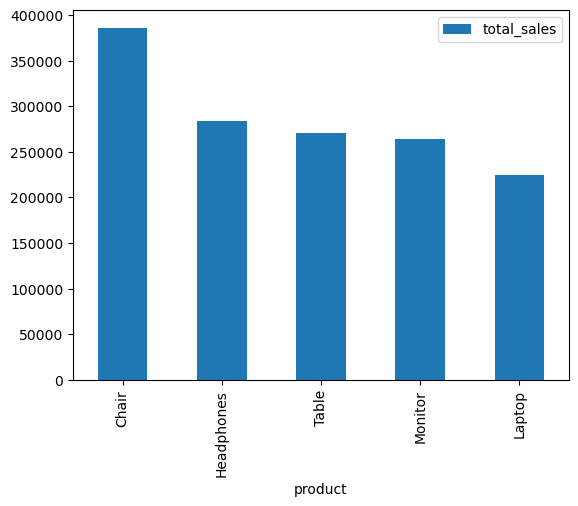

In [15]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("sales.db")

# Query
query = """
SELECT product, SUM(amount) as total_sales
FROM sales
GROUP BY product
ORDER BY total_sales DESC
LIMIT 5
"""

top_products = pd.read_sql_query(query, conn)
print(top_products)

# Plot
top_products.plot(kind="bar", x="product", y="total_sales")
plt.show()




      product  total_sales
0       Chair       385865
1  Headphones       284009
2       Table       270680
3     Monitor       264234
4      Laptop       225054


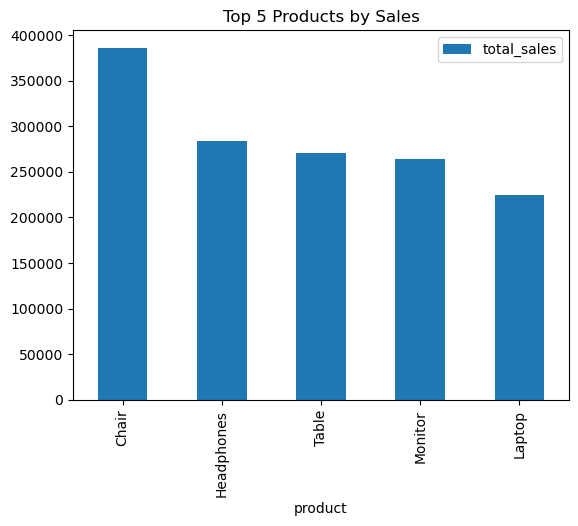

In [16]:
query = """
SELECT product, SUM(amount) as total_sales
FROM sales
GROUP BY product
ORDER BY total_sales DESC
LIMIT 5
"""

top_products = pd.read_sql_query(query, conn)
print(top_products)

top_products.plot(kind="bar", x="product", y="total_sales")
plt.title("Top 5 Products by Sales")
plt.show()


In [17]:
query = """
SELECT customer, SUM(amount) as total_spent
FROM sales
GROUP BY customer
ORDER BY total_spent DESC
LIMIT 5
"""
top_customers = pd.read_sql_query(query, conn)
print(top_customers)


  customer  total_spent
0    Meera       524353
1    Sneha       293011
2    Arjun       259116
3    Kiran       201724
4     Ravi       173038


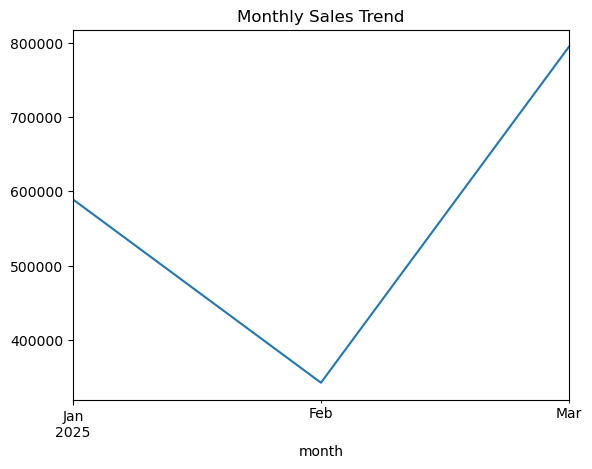

In [18]:
df["date"] = pd.to_datetime(df["date"])
df["month"] = df["date"].dt.to_period("M")

monthly_sales = df.groupby("month")["amount"].sum()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.show()


In [19]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)


In [20]:
total_revenue = df["amount"].sum()
total_orders = df["order_id"].nunique()
total_customers = df["customer"].nunique()

print("Total Revenue:", total_revenue)
print("Total Orders:", total_orders)
print("Total Customers:", total_customers)


Total Revenue: 1726089
Total Orders: 50
Total Customers: 7


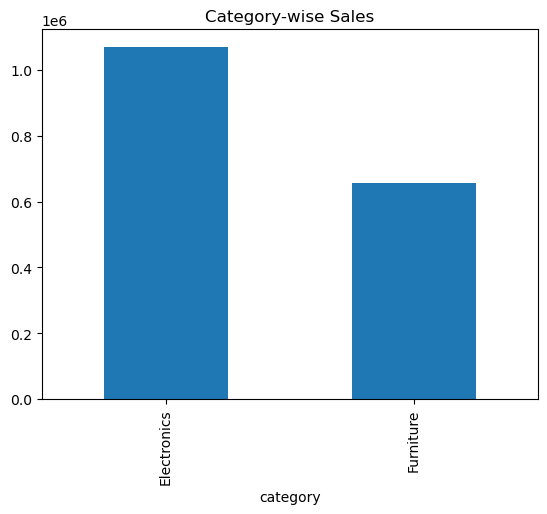

In [21]:
category_sales = df.groupby("category")["amount"].sum()
category_sales.plot(kind="bar", title="Category-wise Sales")
plt.show()


In [22]:
best_month = monthly_sales.idxmax()
best_value = monthly_sales.max()

print(f"Best performing month: {best_month} with sales of {best_value}")


Best performing month: 2025-03 with sales of 794455


In [23]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
